In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
# sns.set_context('paper', font_scale=0.73)
sns.set_context('paper', font_scale=1.3)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

In [2]:
!echo $CONDA_DEFAULT_ENV

In [5]:
#paths
root_dir = "/home/ryan/haveibeentrainedon/models/unstealthy_raretoken"
dataset_names = ["wikitext_64"]
model_size = "70M"
scored_file = "scored.csv"

error_model = "30000_model"

experiments = [f"{root_dir}/{dataset_name}/{model_size}" for dataset_name in dataset_names]
experiments

['/home/ryan/haveibeentrainedon/models/unstealthy_raretoken/wikitext_64/70M']

In [6]:
models = list(filter(lambda x: x[-5:] == "model" and error_model not in x, os.listdir(experiments[0])))
models = sorted(models, key = lambda x: eval(x[:-6]))
models

['0_model',
 '1_model',
 '2_model',
 '10000_model',
 '10001_model',
 '10002_model',
 '20000_model',
 '20001_model',
 '20002_model',
 '30001_model',
 '30002_model',
 '40000_model',
 '40001_model',
 '40002_model',
 '50000_model',
 '50001_model',
 '50002_model']

In [7]:
experiments_dfs = []
for experiment in experiments:
    model_dfs = []
    for model_type in models:
        model_dfs += [pd.read_csv(os.path.join(experiment,  model_type, scored_file), header=None)]
    experiments_dfs.append(model_dfs)
print(len(experiments_dfs))
print(len(model_dfs))

1
17


In [8]:
print(experiments_dfs[0][0].columns)

Int64Index([0], dtype='int64')


In [13]:
x_axis = [0, 10000, 20000, 30000, 40000, 50000]
y_axises = []
for experiment_dfs in experiments_dfs:
    y_axis = []
    for model_df in experiment_dfs:
        null = model_df[0][1:]
        mean = np.log(null).mean()
        stdev = np.log(null).std()
        
        statistic = np.log(model_df[0][0])
        # print(f"statistic = {statistic}, mean = {mean}, stdev = {stdev}")

        
        y_axis += [(statistic - mean) / stdev]
    averaged_y = [np.array(y_axis[0:3]).mean(), np.array(y_axis[3:6]).mean(), np.array(y_axis[6:9]).mean(), \
                  np.array(y_axis[9:11]).mean(), np.array(y_axis[11:14]).mean(), np.array(y_axis[14:17]).mean()]
    # for i in range(0, len(y_axis), 3):
    #     averaged_y += [np.array(y_axis[i:i+3]).mean()]
    y_axises.append(averaged_y)
print(len(y_axises[0]))

6


In [14]:
y_axises

[[-3.579920238018145,
  -6.502335102261326,
  -9.997700070162288,
  -14.045337968396243,
  -14.053786384160105,
  -13.612209293671858]]

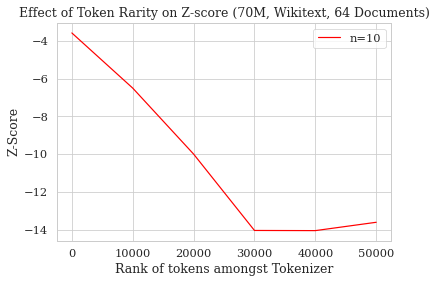

In [15]:
# Create a line plot for each set of y-values
ax = sns.lineplot(x=x_axis, y=y_axises[0], color='red', label='n=10')
# sns.lineplot(x=x_axis, y=y_axises[1], color='blue', label='n=20')
# ax = sns.lineplot(x=x_axis, y=y_axises[2], color='green', label='n=40')

# Customize the plot
plt.title('Effect of Token Rarity on Z-score (70M, Wikitext, 64 Documents)')
plt.xlabel('Rank of tokens amongst Tokenizer')
plt.ylabel('Z-Score')
plt.legend()

# ax.set_xscale("log")

# Show the plot
plt.show()